In [1]:
## Required Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py 
import plotly.graph_objs as go

In [7]:
## Load the Dataset
data = pd.read_csv("online_shoppers_intention.csv")

In [8]:
missing_values = data.isnull().sum()
print("Missing Values in each column:\n", missing_values)

Missing Values in each column:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [9]:
x = data.iloc[:, [5, 6]].values
x.shape

(12330, 2)

Defining the number of clusters using k-elbow method.

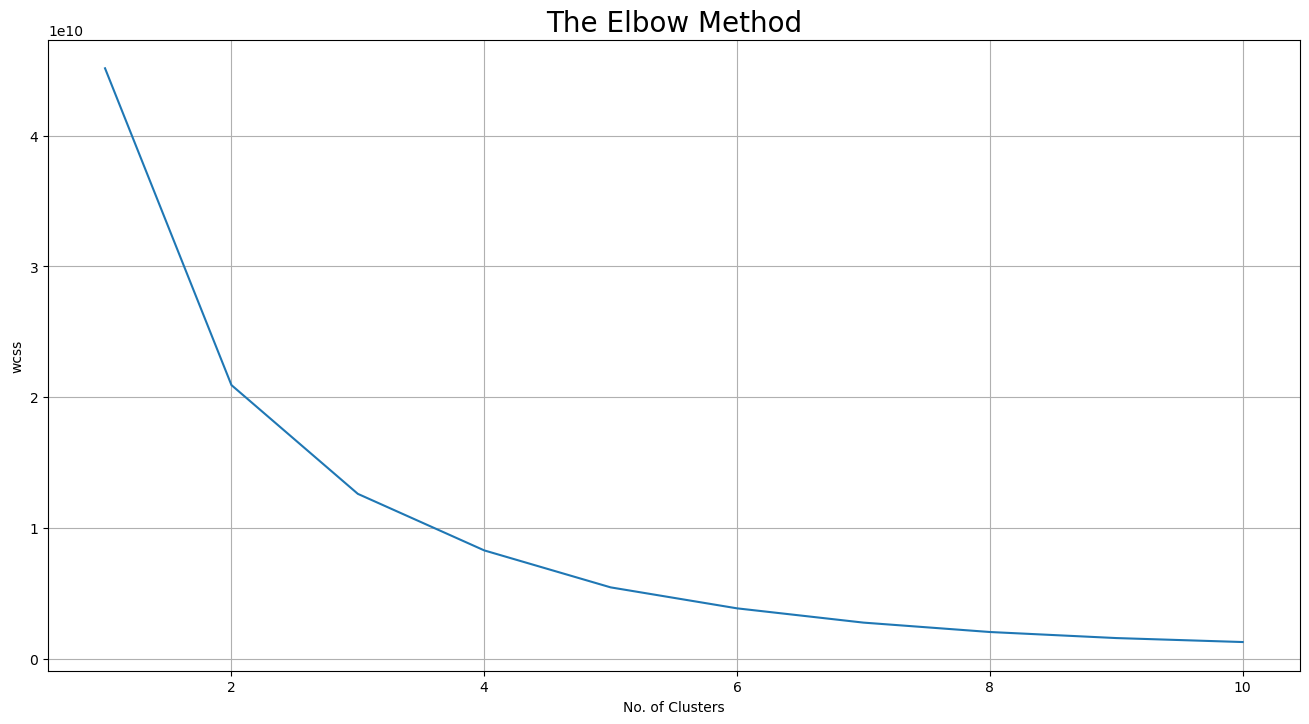

In [12]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'lloyd',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

### K - Means Clustering

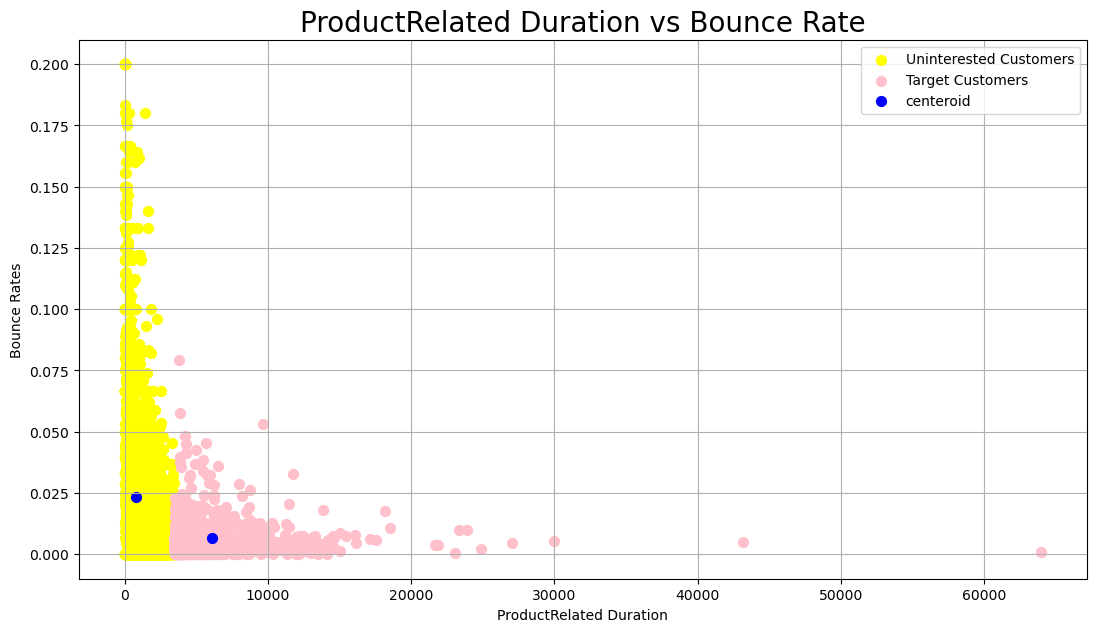

In [13]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# get predicted cluster index for each sample: 0, 1, 2
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'yellow', label = 'Uninterested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('ProductRelated Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

Adjusted rand index:
0.08359442469281096


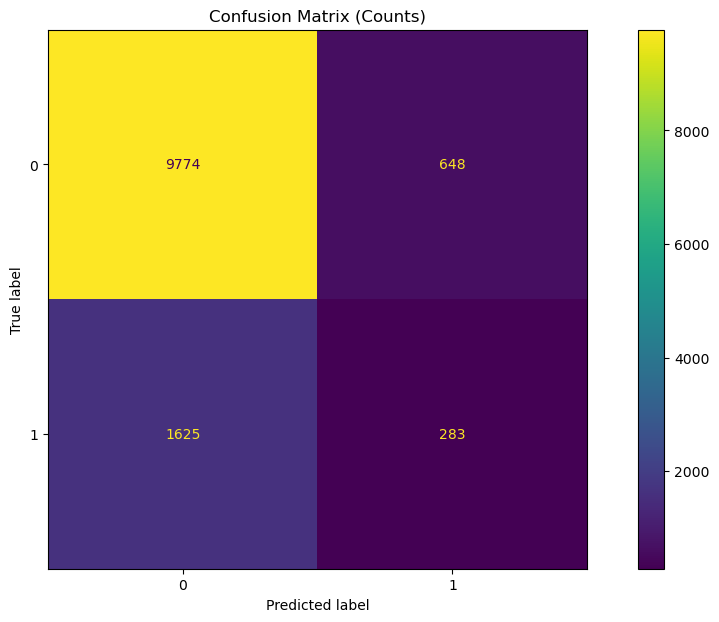

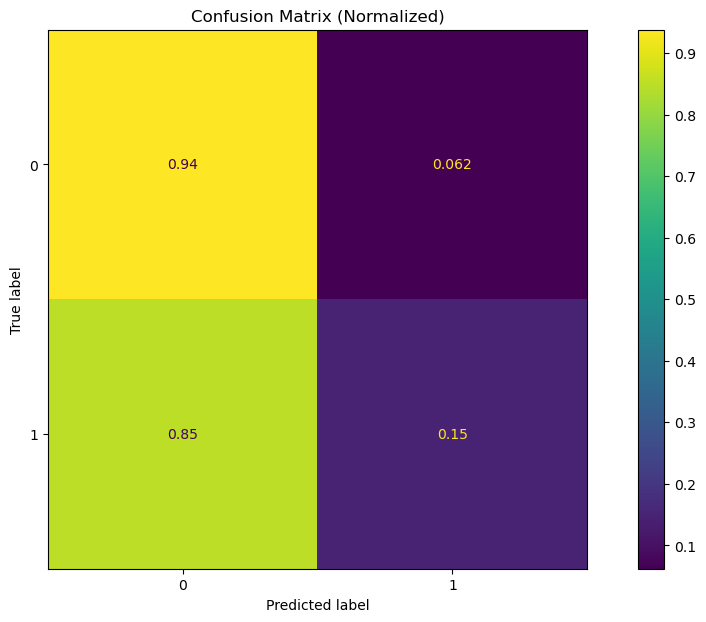

In [18]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Encode true labels
le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])

# 2. Obtain predicted cluster labels
labels_pred = y_means  # Replace with your clustering result

# 3. Calculate Adjusted Rand Index
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print("Adjusted rand index:")
print(score)

# 4. Plot confusion matrix (raw counts)
disp = ConfusionMatrixDisplay.from_predictions(labels_true, labels_pred)
disp.ax_.set_title("Confusion Matrix (Counts)")
plt.show()

# 5. Plot confusion matrix (normalized)
disp_norm = ConfusionMatrixDisplay.from_predictions(
    labels_true, labels_pred, normalize='true'
)
disp_norm.ax_.set_title("Confusion Matrix (Normalized)")
plt.show()
